<a href="https://colab.research.google.com/github/naveenvarma600/BREAST-CANCER-PREDICTION/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

LOADING DATA SET

In [7]:
x=pd.read_csv("breast_cancer_data.csv")

UNDERSTANDING DATA SET

In [8]:
x.head()
x.describe()
x.corr()
x["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

CONVERTING INTO NUMERIC DATA


In [9]:
#Malignant is represented by 1 and Belign is represented by 0
x1={"M":1,"B":0}
x["diagnosis"]=x["diagnosis"].map(x1)

Assigning predicting(x) and result(y) variables

In [10]:
y=x["diagnosis"]
x.drop(["id","diagnosis","Unnamed: 32"],axis=1,inplace=True)

In [13]:
#splitting data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=42)

GRABBING STAGE NAME(malignant or belign) FROM INTEGER DATA

In [23]:
def get_stage(number):
  if number==0:
    return "Belign"
  else:
    return "Malignant"

LOGISTIC REGRESSION

In [55]:
from sklearn.linear_model import LogisticRegression
reg_log=LogisticRegression()
reg_log.fit(x_train,y_train)

# predciting the testing data
y_pred=reg_log.predict(x_test)

from sklearn.metrics import accuracy_score
reg_log_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it is malignant or belign
my_pred=reg_log.predict(np.asarray((20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678)).reshape(1,-1))
get_stage(my_pred)

'Malignant'

K NEAREST NEIGHGBORS

In [56]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn=KNeighborsClassifier()
clf_knn.fit(x_train,y_train)

# predciting the testing data
y_pred=clf_knn.predict(x_test)

from sklearn.metrics import accuracy_score
clf_knn_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it is malignant or belign
my_pred=clf_knn.predict(np.asarray((20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678)).reshape(1,-1))
get_stage(my_pred)


'Malignant'

NAIVE BAYES

In [57]:
from sklearn.naive_bayes import GaussianNB
clf_gnb=GaussianNB()
clf_gnb.fit(x_train,y_train)

# predciting the testing data
y_pred=clf_gnb.predict(x_test)

from sklearn.metrics import accuracy_score
clf_gnb_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it is malignant or belign.
my_pred=clf_gnb.predict(np.asarray((20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678)).reshape(1,-1))
get_stage(my_pred)

'Malignant'

VISUALIZATION OF MORE ACCURATE ALGORITHM

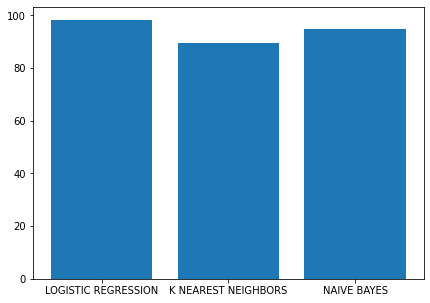

In [58]:
plt.figure(figsize=(7,5))
models=["LOGISTIC REGRESSION","K NEAREST NEIGHBORS","NAIVE BAYES"]
numbers=[reg_log_score,clf_knn_score,clf_gnb_score]
plt.bar(models,numbers)
plt.show()

From the above bar graph,we can clearly say that logistic regression best suits the problem.